# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("Agg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_ex1_trades_df()
ex2_trades = ta.get_ex2_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(850, 850)

## トレード結果

In [9]:
ta.display()

トレード情報
-------------------  -------------------
         レコード数                25496
           取引回数                  850
           開始日時  2021-04-03 09:23:35
           終了日時  2021-04-04 07:20:13
        取引時間[H]             21:56:38
      取引単位[BTC]               0.0001
  利確しきい値[JPY]                 1000
損切りマージン[JPY]                 1000
-------------------  -------------------


トレード結果
-----------  ------
開始[JPY]     14593
終了[JPY]     13966
利益[JPY]      -627
開始[BTC]    0.0024
終了[BTC]    0.0024
利益[BTC]         0
開始[TOTAL]   30354
終了[TOTAL]   29336
利益[TOTAL]   -1018
-----------  ------


トレード利益
  Bot利益    トレード利益    市場利益
---------  --------------  ----------
    -1018        -627.704    -390.296


## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2021-04-04 06:49:03,sell,642.570,buy,642.032,0.538
2021-04-04 06:49:41,buy,642.571,sell,642.215,-0.356
2021-04-04 06:50:24,sell,642.727,buy,642.218,0.509
2021-04-04 06:51:04,buy,642.728,sell,642.360,-0.368
2021-04-04 06:51:35,sell,642.602,buy,641.915,0.687
2021-04-04 06:52:49,buy,641.317,sell,640.444,-0.873
2021-04-04 06:52:52,sell,641.000,buy,640.476,0.524
2021-04-04 06:53:20,buy,639.000,sell,638.822,-0.178
2021-04-04 06:53:27,buy,639.121,sell,639.436,0.315


In [12]:
round(sum(profit_df.profit), 3)

38.265

## トレードグラフ

In [13]:
ex1_ticks = ta.get_ex1_ticks_df()
ex2_ticks = ta.get_ex2_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(25496, 25496)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('exchange1 bid/exchange2 ask')
ax2.set_title('exchange2 bid/exchange1 ask')

Text(0.5, 1.0, 'exchange2 bid/exchange1 ask')

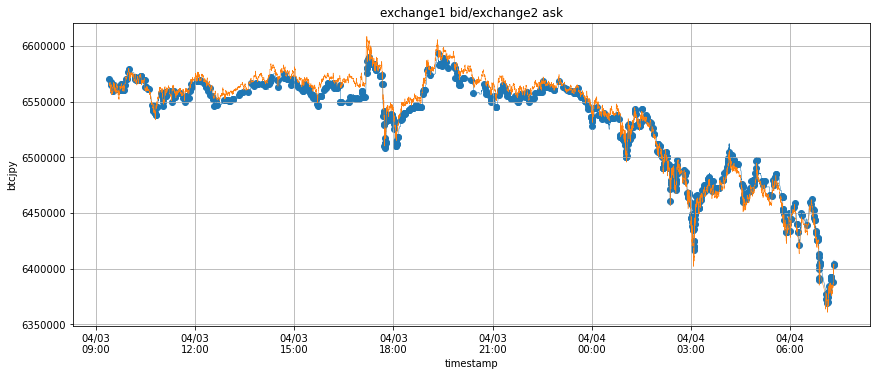

In [16]:
fig1

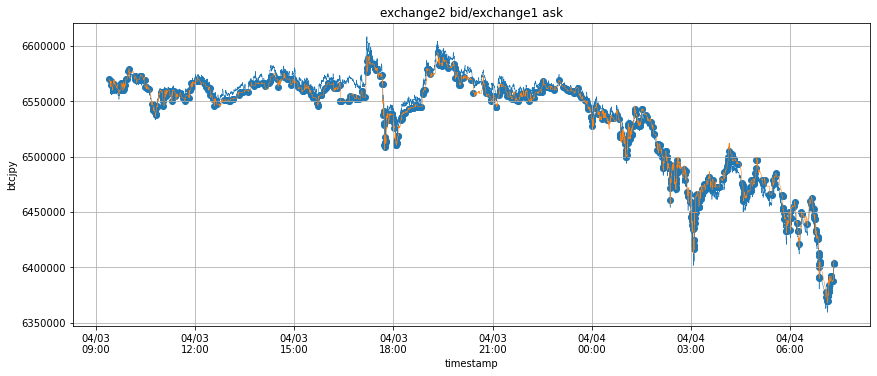

In [17]:
fig2